In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [5]:
!cd yolov5 & pip install -r requirements.txt --upgrade

     ---------------------------------------- 0.0/184.3 kB ? eta -:--:--
     -------------------------------------- 184.3/184.3 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     - -------------------------------------- 0.2/7.6 MB 7.6 MB/s eta 0:00:01
     -- ------------------------------------- 0.4/7.6 MB 6.4 MB/s eta 0:00:02
     -- ------------------------------------- 0.5/7.6 MB 4.1 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/7.6 MB 3.9 MB/s eta 0:00:02
     ----- ---------------------------------- 1.1/7.6 MB 5.1 MB/s eta 0:00:02
     ------- -------------------------------- 1.5/7.6 MB 5.7 MB/s eta 0:00:02
     ---------- ----------------------------- 1.9/7.6 MB 6.2 MB/s eta 0:00:01
     ------------ --------------------------- 2.4/7.6 MB 6.6 MB/s eta 0:00:01
     -------------- ------------------------- 2.8/7.6 MB 6.9 MB/s eta 0:00:01
     ----------------- ---------------------- 3.3/7.6 MB 7.3 MB/s eta 0:00

In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [22]:
!pip install ipywidgets

In [23]:
model = torch.hub.load('yolov5', 'yolov5s', source='local')

YOLOv5  v7.0-175-g5f11555 Python-3.10.11 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 


[Errno 2] No such file or directory: 'c:\\users\\aayus\\anaconda3\\envs\\gameobjectdetection\\lib\\site-packages\\requests-2.29.0.dist-info\\METADATA'


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [24]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [25]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [26]:
img

'https://ultralytics.com/images/zidane.jpg'

In [27]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 409.3ms pre-process, 40.5ms inference, 5.0ms NMS per image at shape (1, 3, 384, 640)


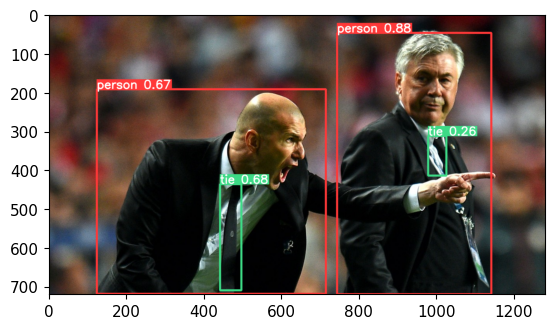

In [28]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [29]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

In [30]:
!pip install pyautogui

In [31]:
# Import some dependencies
import pyautogui
import cv2
import numpy as np

In [46]:
# Loop over the frames
while True: 
    # Take a screenshot 
    screen = pyautogui.screenshot()
    # Convert the output to a numpy array
    screen_array = np.array(screen)
    # Crop out the region we want - height, width, channels   
    cropped_region = screen_array[25:625, 1122:, :]
    # Convert the color channel order
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    
    # Make detections 
    results = model(corrected_colors)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))

    # Cv2.waitkey
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
# Close down the frame
cv2.destroyAllWindows()

In [37]:
import uuid   # Unique identifier
import os
import time

In [47]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
# labels = ['left_obs', 'right_obs', 'timberman']
number_imgs = 100

In [49]:
# Loop over the frames
for img_num in range(number_imgs): 
    print('Collecting image number {}'.format(img_num))

    screen = pyautogui.screenshot()
    screen_array = np.array(screen)
    cropped_region = screen_array[25:625, 1122:, :]
    
    imgname = os.path.join(IMAGES_PATH, str(uuid.uuid1())+'.jpg')
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    cv2.imwrite(imgname, corrected_colors)

    results = model(corrected_colors)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # 2 second delay between captures
    time.sleep(0.2)

    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cv2.destroyAllWindows()

In [50]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [51]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [52]:
# Changed flip LR in D:\YouTube\1-02-2022 - Timberman\yolov5\data\hyps\hyp.scratch.yaml

In [55]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 2000 --data dataset.yml --hyp hyp.scratch.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=hyp.scratch.yaml, epochs=2000, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-175-g5f11555 Python-3.10.11 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, 

In [57]:
model = torch.hub.load('yolov5', 'custom', source='local', path='yolov5/runs/train/exp/weights/best.pt', force_reload=True)

YOLOv5  v7.0-175-g5f11555 Python-3.10.11 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [66]:
img = os.path.join('data', 'images', '6c6e4346-0166-11ee-9427-48e7da5d2d1e.jpg')

In [67]:
results = model(img)

In [68]:
results.print()

image 1/1: 600x798 1 right_obs, 1 timberman, 1 left_obs
Speed: 11.2ms pre-process, 64.5ms inference, 2.5ms NMS per image at shape (1, 3, 512, 640)


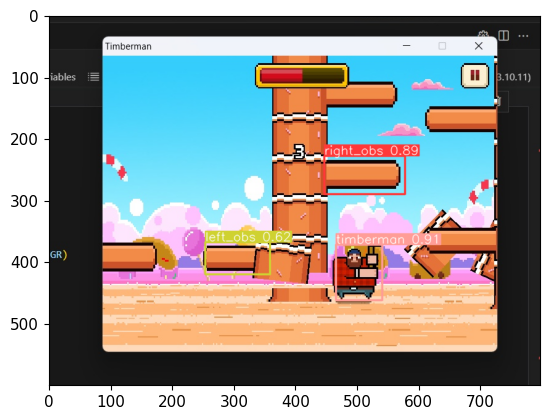

In [69]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [70]:
# Loop over the frames
while True: 
    # Take a screenshot 
    screen = pyautogui.screenshot()
    # Convert the output to a numpy array
    screen_array = np.array(screen)
    # Crop out the region we want - height, width, channels   
    cropped_region = screen_array[25:625, 1122:, :]
    # Convert the color channel order
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    
    # Make detections 
    results = model(corrected_colors)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))

    # Cv2.waitkey
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
# Close down the frame
cv2.destroyAllWindows()

True